In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# The Dataset - USArrests

This dataset contains statistics, in arrests per 100,000 residents, for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

https://www.kaggle.com/datasets/kurohana/usarrets

In [39]:
df = pd.read_csv("USArrests.csv", index_col='City')
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [40]:
print('Number of cases: {} Number of features: {}'.format(df.shape[0],df.shape[1]))

Number of cases: 50 Number of features: 4


# Cleaning the dataset

In [41]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [42]:
missing_values_count = df.isnull().sum()

missing_values_count

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [43]:
#create summary table

stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.788,4.355510,0.8,17.4
Assault,170.760,83.337661,45.0,337.0
UrbanPop,65.540,14.474763,32.0,91.0
Rape,21.232,9.366385,7.3,46.0


To visualise the distribution of the observations for each feature, we plot a histogram using Pandas's ```.hist()``` function:

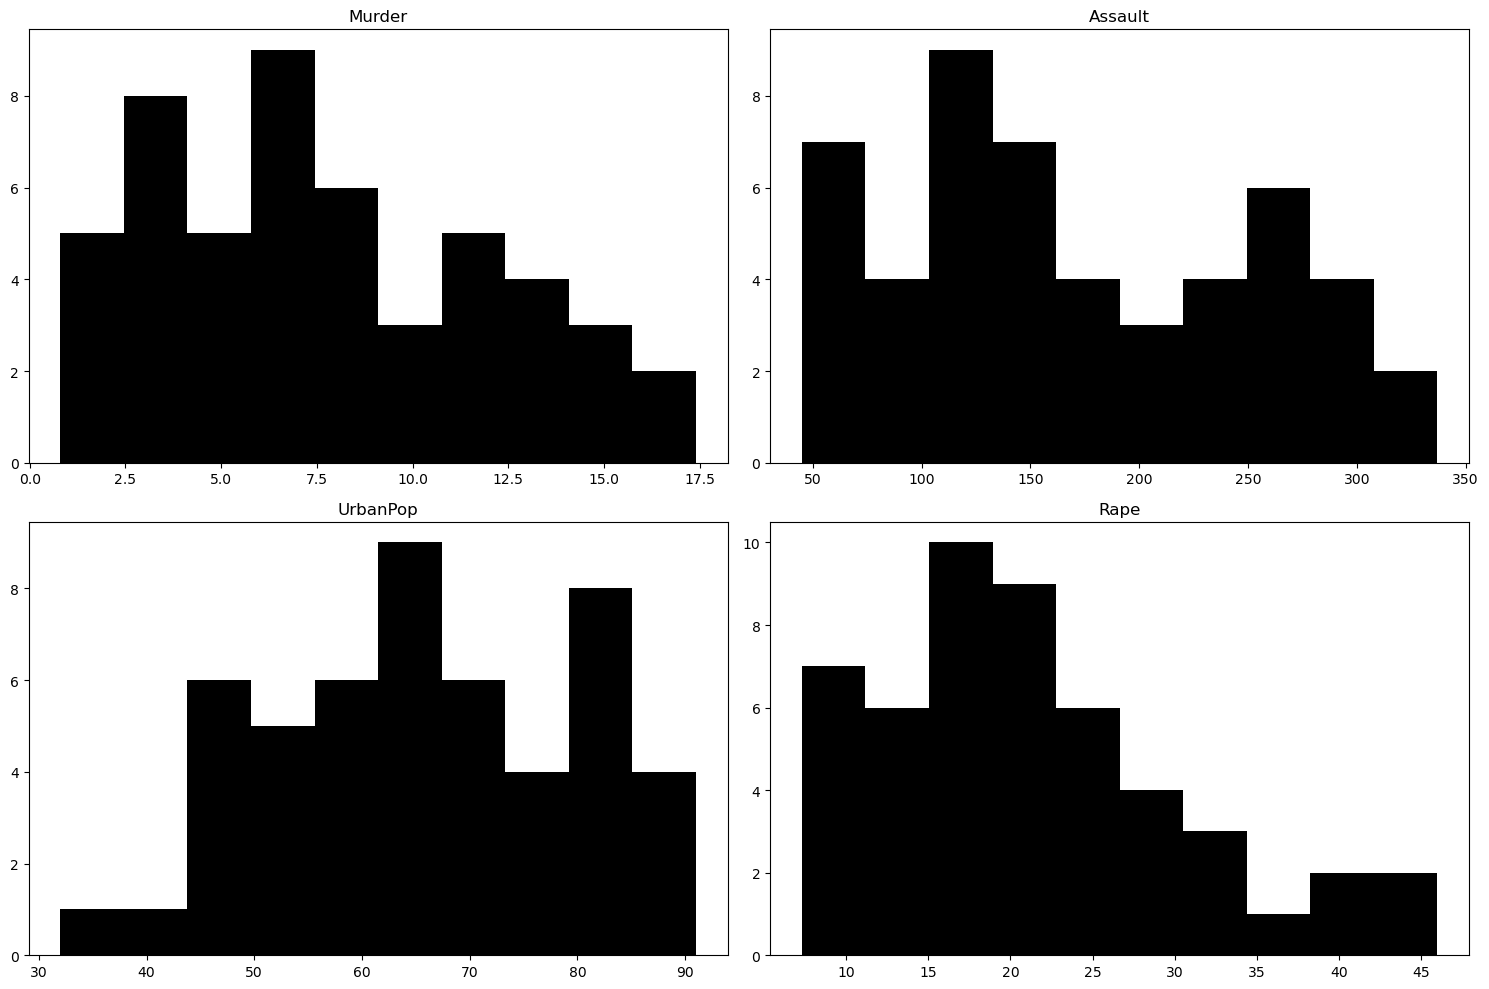

In [44]:
histograms = df.hist(color='black', grid=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

At first glance, there are more assaults per 100,000 residents than any other crime. The variable's mean and standard deviation is dramatically higher than the other variables. This suggests that assault is a more common crime and indicates that scaling the data will be useful to keep the assault variable from impacting the analysis disproportionately.

# DATA STORIES AND VISUALISATIONS

1. Visualisation of average of each variable

In [45]:
#average of whole data set
data_avg = round(df.mean(),0)
data_avg

Murder        8.0
Assault     171.0
UrbanPop     66.0
Rape         21.0
dtype: float64

<AxesSubplot:>

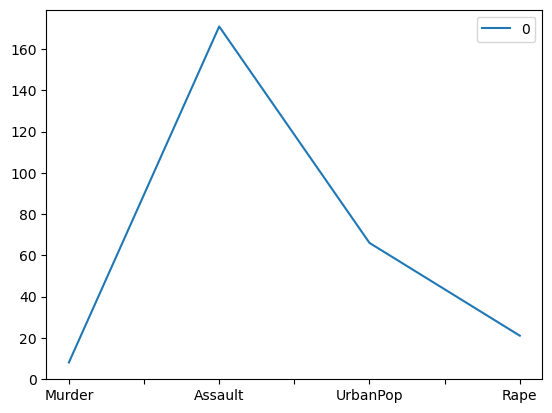

In [46]:
overall_score = pd.DataFrame(data_avg)

overall_score.plot(kind='line')

2. UrbanPop

In [47]:
large5 = df.nlargest(5, "UrbanPop")
large5

,Murder,Assault,UrbanPop,Rape
City,,,,
California,9.0,276,91,40.6
New Jersey,7.4,159,89,18.8
Rhode Island,3.4,174,87,8.3
New York,11.1,254,86,26.1
Massachusetts,4.4,149,85,16.3


<AxesSubplot:xlabel='City'>

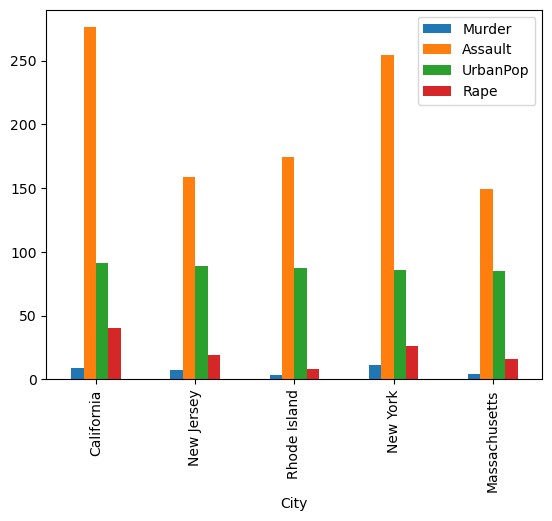

In [48]:
large5.plot(kind='bar')

In [49]:
small5 = df.nsmallest(5, "UrbanPop")
small5

,Murder,Assault,UrbanPop,Rape
City,,,,
Vermont,2.2,48,32,11.2
West Virginia,5.7,81,39,9.3
Mississippi,16.1,259,44,17.1
North Dakota,0.8,45,44,7.3
North Carolina,13.0,337,45,16.1


<AxesSubplot:xlabel='City'>

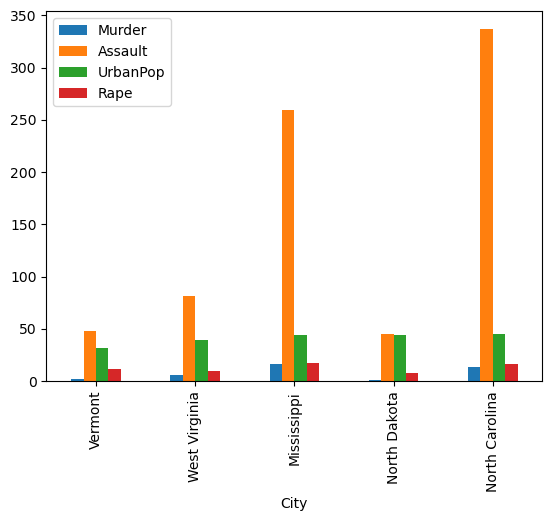

In [50]:
small5.plot(kind='bar')

By comparing the two charts, it can be shown that UrbanPop does not influence the amount of arrests per 100,000 residents, for assault, murder, and rape. 

For example, North Carolina, with the lowest percent (45) of the population living in urban areas, has an arrest rate of over 300 per 100,000 residents for assault. On the other hand, California, with the highest percent (91) of the population living in urban areas, has an arrest rate of over 250 per 100,000 residents for assault.

Removed UrbanPop from database


In [51]:
df.drop('UrbanPop',axis=1, inplace=True)

3. Crime Comparison

In [52]:
murder_small5 = df.nsmallest(5, "Murder")
murder_small5

,Murder,Assault,Rape
City,,,
North Dakota,0.8,45,7.3
Maine,2.1,83,7.8
New Hampshire,2.1,57,9.5
Iowa,2.2,56,11.3
Vermont,2.2,48,11.2


In [53]:
assault_small5 = df.nsmallest(5, "Assault")
assault_small5

,Murder,Assault,Rape
City,,,
North Dakota,0.8,45,7.3
Hawaii,5.3,46,20.2
Vermont,2.2,48,11.2
Wisconsin,2.6,53,10.8
Iowa,2.2,56,11.3


In [54]:
rape_small5 = df.nsmallest(5, "Rape")
rape_small5

,Murder,Assault,Rape
City,,,
North Dakota,0.8,45,7.3
Maine,2.1,83,7.8
Rhode Island,3.4,174,8.3
West Virginia,5.7,81,9.3
New Hampshire,2.1,57,9.5


In [55]:
murder_large5 = df.nlargest(5, "Murder")
murder_large5

,Murder,Assault,Rape
City,,,
Georgia,17.4,211,25.8
Mississippi,16.1,259,17.1
Florida,15.4,335,31.9
Louisiana,15.4,249,22.2
South Carolina,14.4,279,22.5


In [56]:
murder_large5 = df.nlargest(5, "Assault")
murder_large5

,Murder,Assault,Rape
City,,,
North Carolina,13.0,337,16.1
Florida,15.4,335,31.9
Maryland,11.3,300,27.8
Arizona,8.1,294,31.0
New Mexico,11.4,285,32.1


In [57]:
rape_large5 = df.nlargest(5, "Rape")
rape_large5

,Murder,Assault,Rape
City,,,
Nevada,12.2,252,46.0
Alaska,10.0,263,44.5
California,9.0,276,40.6
Colorado,7.9,204,38.7
Michigan,12.1,255,35.1


If the murder arrest rate is low in a state you can assume that the other crimes arrest rate is low too. If the murder arrest rate is high in a state you can assume that the other crimes arrest rate is high too. This trend is similar for all arrests.

# Correlation Analysis

Pandas offers a highly useful function, ``corr``, which allows us to compute correlations between the different columns. The standard correlation coefficient is the Pearson coefficient. It returns a matrix of values. It is often useful to visualise these as a plot. Both Pandas and Seaborn have functions for plotting correlation heatmaps, but Seaborn's offers more adjustabilty. 

https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/

In [82]:
arrests = df.index
corr_df = df.corr()
labels =corr_df.columns

correlations = corr_df.corr()


C:\Users\rache\AppData\Local\Temp\ipykernel_33012\761493973.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)


<AxesSubplot:>

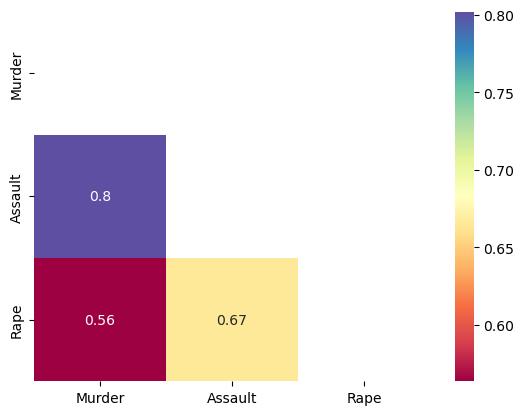

In [83]:
import seaborn as sns
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="Spectral", annot=True)

The variables only have positive correlations which mean that an increase in one will also leads to an increase in another. 

From the correlation plot, it is evident that murder has a relatively strong positive correlation to assault and rape. These correlations are intuitive as states with a high murder rate are probably areas where other violent crimes occur.

The correlation plot also indicates that assault has a strong positive correlation with rape. 

Overall, the variables that have strong positive correlations with each other. This makes the data a good candidate for Principal Components Analysis.


# Principal Components Analysis (PCA)

Principal Components Analysis (PCA) is a method for finding the underlying variables (i.e. principal components) that best differentiate the observations by determining the directions along which your data points are most spread out. Since the determination of the principal components is based on finding the direction that maximises the variance, variables with variance that are much higher than the other variables tend to dominate the analysis purely due to their scale. PCA is a dimensionality reduction technique which is useful when we have a lot of variables, and need to reduce these.

In [84]:
from sklearn.decomposition import PCA

np.set_printoptions(precision=2)

X = df.values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2
0,65.223,-4.860,2.813
1,93.737,16.227,-2.124
2,123.530,0.362,-4.868
3,19.081,-3.165,0.295
4,106.355,11.325,-3.528


In [85]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.64  6.98  2.59]


In [86]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.92e-01 6.90e-03 9.54e-04]


In [87]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [6996.48 7045.14 7051.87]


In [88]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = arrests[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

Unscaled Biplot:

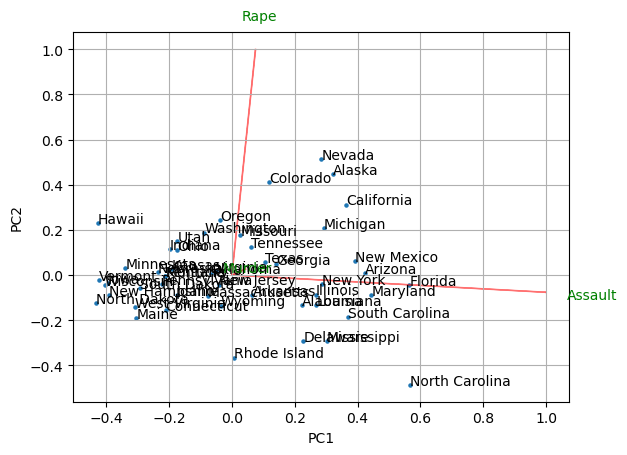

In [89]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(arrests))
plt.show()

Each point on a biplot is the projected observation, transformed from the original data. The importance of each feature is indicated by the length of the arrows on the biplot. This corresponds to the magnitude of the values in the eigenvectors.From this biplot you can see that assault and rape are the most important features as the arrows to each of those dominate the biplot.

The majority of the cities are clustered together which indicates that they have similar principal component scores.

From this biplot, it is difficult to define relationships. It appears the features overpower each other.

This information can also be quantified as follows:

In [90]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pc1 = abs( pca.components_[0] )
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.026
1,Assault,0.996,0.076
2,Rape,0.075,0.997


Scaled Biplot

We standardise the data so that some features do not swamp the others.

In [91]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2
0,1.210,0.842,0.164
1,2.332,-1.539,-0.039
2,1.519,-0.503,-0.887
3,0.178,0.328,-0.072
4,2.066,-1.285,-0.385


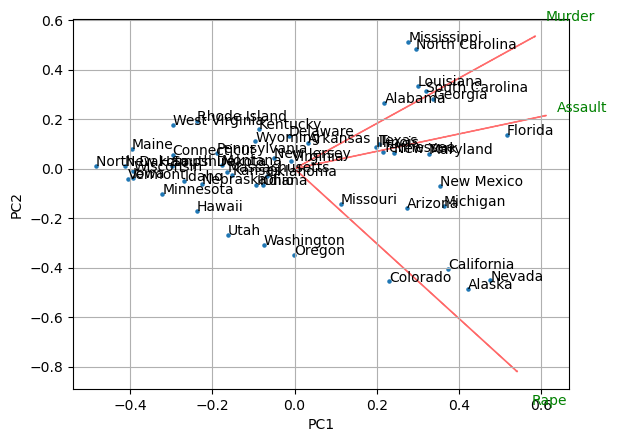

In [92]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

Immediately you can spot the difference between the unscaled and scaled biplot. as the features are much clearer. The scaled biplot shows that murder and assault are closely related. If you group murder and assault together it can be argued that they have little correlation with rape.

It is shown that Colorado, California, Alaska, and Nevada have the highest number of arrests per 100,000 residents for rape.

Florida has the highest number of arrests per 100,000 residents for assault.

Mississippi, North Caroline, Louisiana, South Carolina, Georgia and Alabama have the highest arrests per 100,000 residents for murder.

There are still a lot of cities grouped together which indicates that they have similar principal component scores.


In [93]:
pc1 = abs( std_pca.components_[0] )
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.583,0.534
1,Assault,0.608,0.214
2,Rape,0.539,0.818


# Scree plot and Cumulative Explained Variance plot

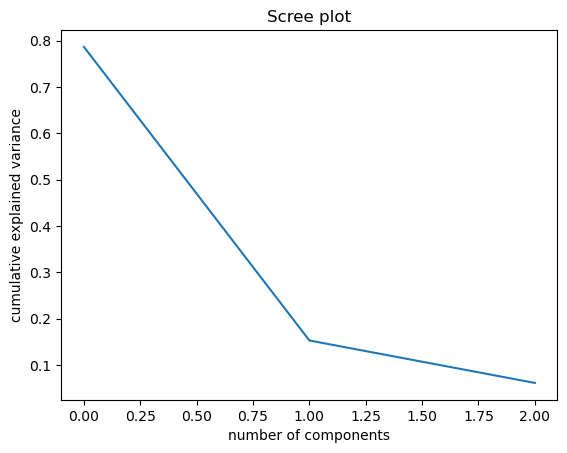

In [81]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

Text(0.5, 1.0, 'Cumulative Explained Variance')

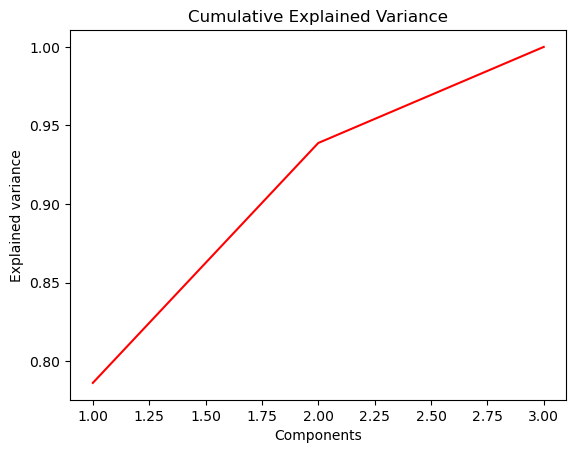

In [94]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

It appears the principal components are spread through 75% of the data. Therefore, it is better to use whole dataset for cluster analysis.

Also, there are only three variables so it is not appropriate to scale down the database.

In [97]:
pca_df = pd.DataFrame(X_std_trans, index = df.index)
pca_df.head()

,0,1,2
City,,,
Alabama,1.210,0.842,0.164
Alaska,2.332,-1.539,-0.039
Arizona,1.519,-0.503,-0.887
Arkansas,0.178,0.328,-0.072
California,2.066,-1.285,-0.385


# Hierarchical clustering

Hierarchical clustering has the advantage that we can see the clusters visually in a dendrogram and don’t have to specify the number of clusters before running the algorithm.

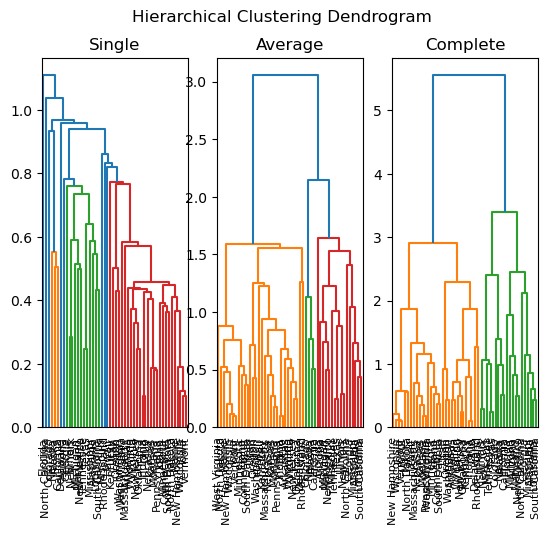

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1)
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

Silhouette Scores

In [114]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [151]:
C = 'complete'
A = 'average'
S = 'single'

complete= AgglomerativeClustering(linkage=C)
complete.fit_predict(pca_df)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [152]:
score = silhouette_score(pca_df, complete.labels_)
print(f'The Silhouette score is: {score}')

The Silhoutte score is: 0.5238335497369089


In [153]:
average = AgglomerativeClustering(linkage=A)
average.fit_predict(pca_df)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [155]:
score = silhouette_score(pca_df, average.labels_)
print(f'The Silhouette score is: {score}')

The Silhoutte score is: 0.5238335497369089


In [156]:
single = AgglomerativeClustering(linkage=S)
single.fit_predict(pca_df)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [157]:
score = silhouette_score(pca_df, single.labels_)
print(f'The Silhouette score is: {score}')

The Silhoutte score is: 0.20166299602779528


The silhouette scores show that the single dendrogram has the lowest score (0.20), indicating the clusters are not well defined in this method. The silhouette score for the average and complete dendrograms are the same (0.52). The difference between the two is that the average method has four clusters whilst the complete method has three clusters.

A clearer dendrogram for the average linkage method is shown below:

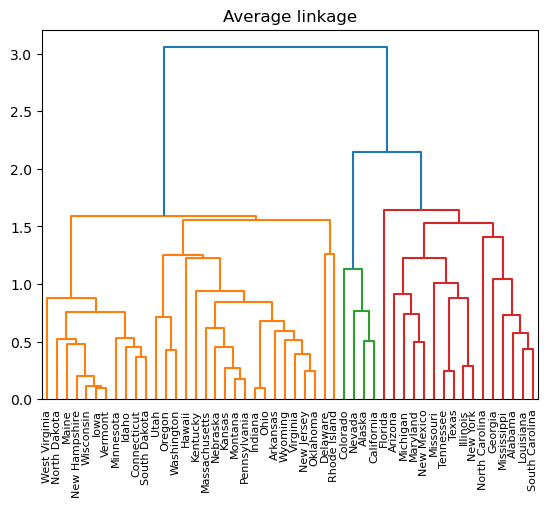

In [160]:
plt.title("Average linkage")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index)
plt.show()

States: 

Orange = West Virginia, North Dakota, Maine, New Hampshire, Wisconsin, Iowa, Vermont, Minnesota, Idaho, Connecticut, South Dakota, Utah, Oregon, Washington, Hawaii, Kentucky, Massachusetts, Nebraska, Kansas, Montana Pennsylvania, Indiana, Ohio, Arkansas, Wyoming, Virginia, New Jersey, Oklahoma, Delaware, Rhode Island

Green = Colorado, Nevada, Alaska, California

Red = Florida, Arizona, Michigan, Maryland, New Mexico, Missouri, Tennessee, Texas, Illinois, New York, North Carolina, Georgia, Mississippi, Alabama, Louisiana, South Carolina

Blue = Uta, Oregon, Washington, Hawaii, Kentucky, Massachusetts, Nebraska, Kansas, Montana Pennsylvania, Indiana, Ohio, Arkansas, Wyoming, Virginia, New Jersey, Oklahoma, Delaware, Rhode Island, Colorado, Nevada, Alaska, California, Florida, Arizona, Michigan, Maryland


Analysis:

The orange cluster contains the states with the lowest amount of arrests per 100,000 residents for assault, murder, and rape.

The green cluster contains the four states with the highest arrests per 100,000 residents for rape.

The red cluster contains the states with the highest amount of arrests per 100,000 residents for assault and murder.

A clearer dendrogram for the complete linkage method is shown below:

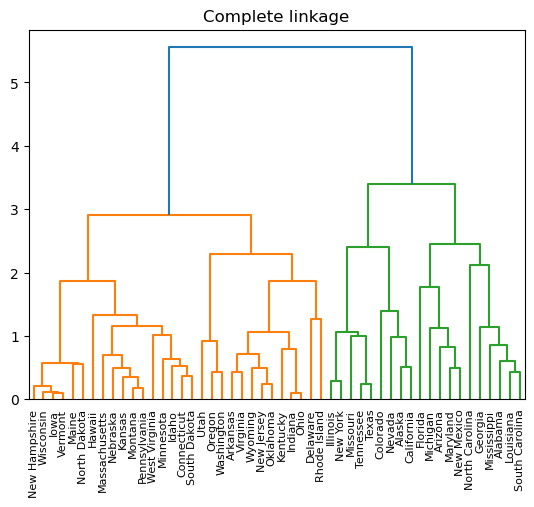

In [99]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

Clusters:

The complete orange cluster contains exactly the same states as the average orange cluster.

The complete green cluster combines all the states in the average red and average green cluster.

The blue clusters were not an exact match. The complete method’s blue cluster contained the following whilst the average method’s blue cluster did not: Minnesota, Idaho, Connecticut, South Dakota, Illinois, New York, Missouri, Tennessee, Texas. On the other hand, the average method’s blue cluster contained the following whilst the complete method’s blue cluster did not Hawaii, Massachusetts, Nebraska, Kansas, Montana Pennsylvania, Florida, Arizona, Michigan, Maryland.


Analysis: 

The orange cluster contains the states with the lowest amount of arrests per 100,000 residents for assault, murder, and rape.

The green cluster on the complete model contains the states with the highest amount of arrests per 100,000 residents for assault, murder, and rape.


# K-Means Clustering

K-means is a very popular clustering partitioning algorithm that is fast and efficient and scales well for large datasets. It is an iterative process, so observations can switch between clusters while the algorithm runs until it converges at a local optimum. This method is not robust when it comes to noise data and outliers and is not suitable for clusters with non-convex shapes. Another drawback with K-means is the necessity of specifying K in advance.

For our analysis, it seems that the shape of clusters is likely to be regular based on the PCA biplot. K will be set to 3. A visualisation of the clusters is shown in the figure below.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


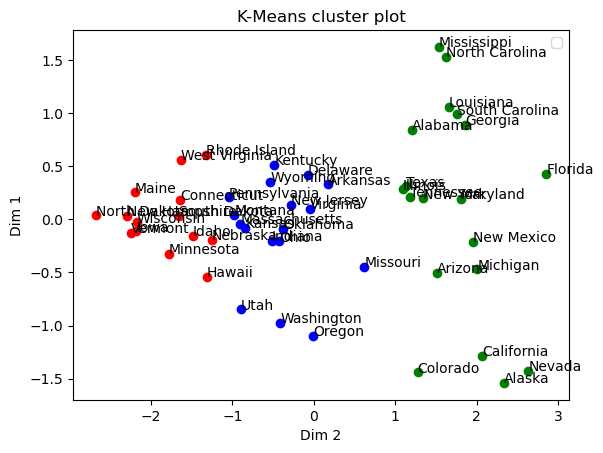

In [170]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = countries[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

The K-means cluster plot has clustered the states based on the amount of arrests made as a whole. The green clusters are the states where there are more arrests, the red clusters are where there are the least number of arrests and the blue clusters represent a middle ground. 

Silhouette Score:

In [171]:
#https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam


kmeans.fit_predict(pca_df)

score = silhouette_score(pca_df, kmeans.labels_)

print(f'The Silhouette score is: {score}')


The Silhouette score is: 0.38058945538162325


As the silhouette score is low this means the clusters are not well defined.

When you compare K-means clustering and hierarchal clustering, hierarchal clustering provides a more accurate result.

Github Link:

https://github.com/RachelBirrell97